In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [120]:
def plot_csv(csv_path, yrange=[]):
    df = pd.read_csv(csv_path, comment="#")
    x = np.array(df["Step"])
    y = np.array(df["Value"])
    plt.figure(figsize=(16, 6))
    y_top = []
    y_bot = []
    y_avg = []
    sd_range = 10
    coef = 1.8
    for i in range(len(x)):
        top = i + sd_range
        bot = i - sd_range
        if i - sd_range < 0:
            bot = 0
        if i + sd_range >= len(x):
            top = len(x)-1
        ci = coef * np.std(y[bot:top])/np.mean(y[bot:top])
        y_avg.append(np.mean(y[bot:top]))
        y_top.append(y[i]+ci)
        y_bot.append(y[i]-ci)

    fig, ax = plt.subplots()
    ax.plot(x,y, label="Result")
    ax.plot(x,y_avg, label="Averaged")
    fig.set_figheight(6)
    fig.set_figwidth(10)
    if not len(yrange) == 0:
        plt.ylim(yrange)
    ax.legend()


## Single Agent Team with PPO 1v1 against Baseline

<Figure size 1152x432 with 0 Axes>

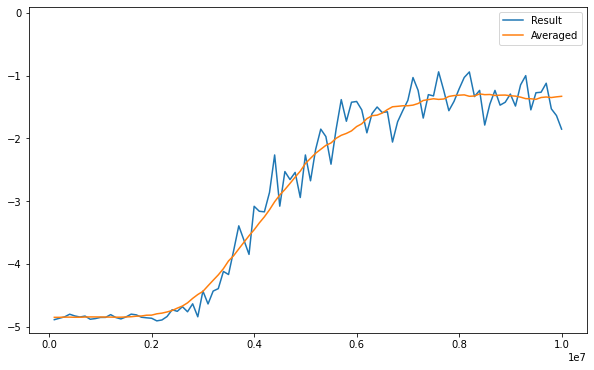

In [121]:
plot_csv("1v1_ppo.csv", [-5.1, 0.1])

## Multi-Agent Team with PPO 2v2 against Baseline

<Figure size 1152x432 with 0 Axes>

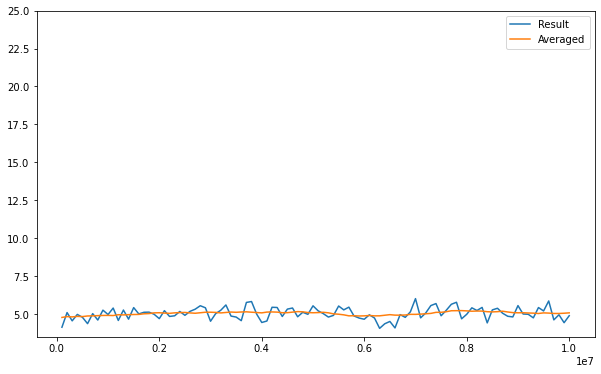

In [123]:
plot_csv("run-ppo_2v2_baseline-tag-training reward.csv", [3.5, 25])

## Multi-Agent Team with PPO 2v2 against Baseline (Observation space simplified)

<Figure size 1152x432 with 0 Axes>

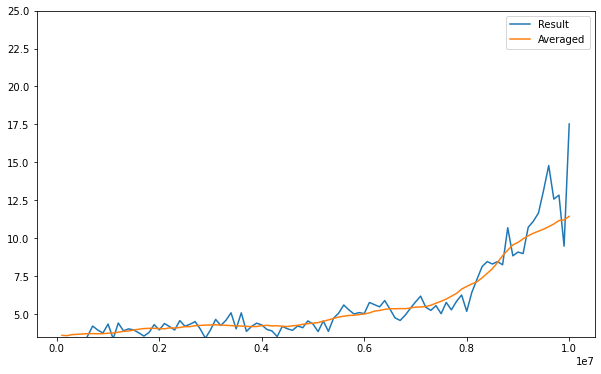

In [124]:
plot_csv("run-ppo_2v2_simpler_baseline-tag-training reward.csv", [3.5, 25])